In [45]:
import pandas as pd
df=pd.read_csv("C:/Users/dheve/OneDrive/Desktop/ml_assignment/Timeseries/Timeseries/exchange_rate.csv")

In [46]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

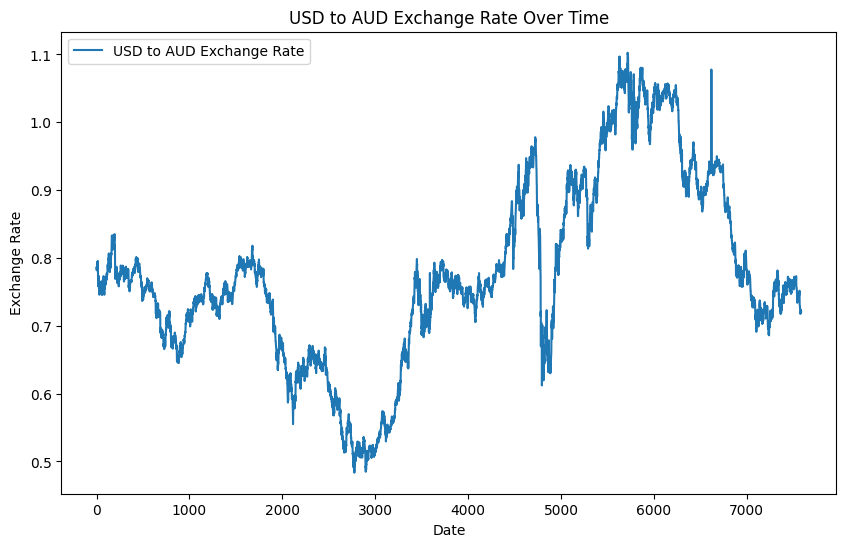

In [47]:
import matplotlib.pyplot as plt

# Plot the exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [48]:
# Check for missing values
df.isnull().sum()




date       0
Ex_rate    0
dtype: int64

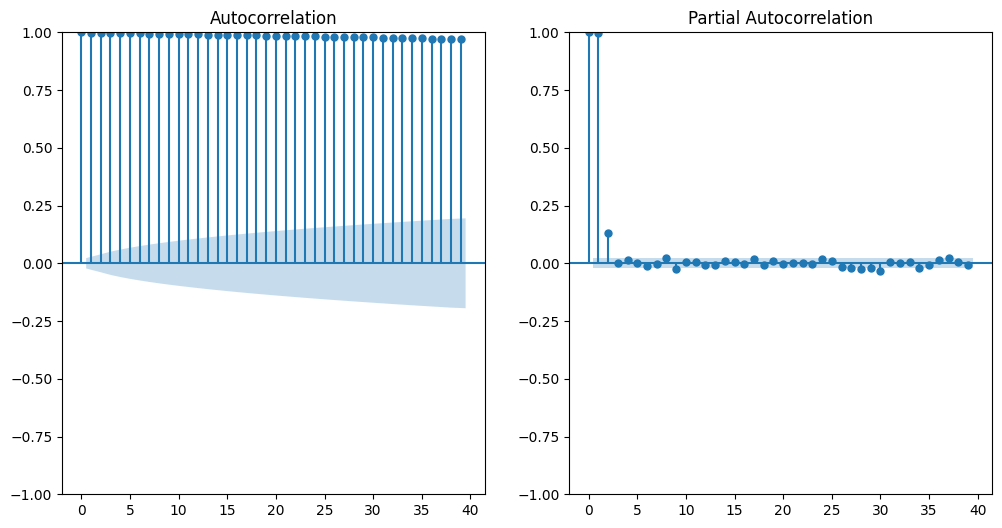

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], ax=plt.gca())
plt.show()


ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901


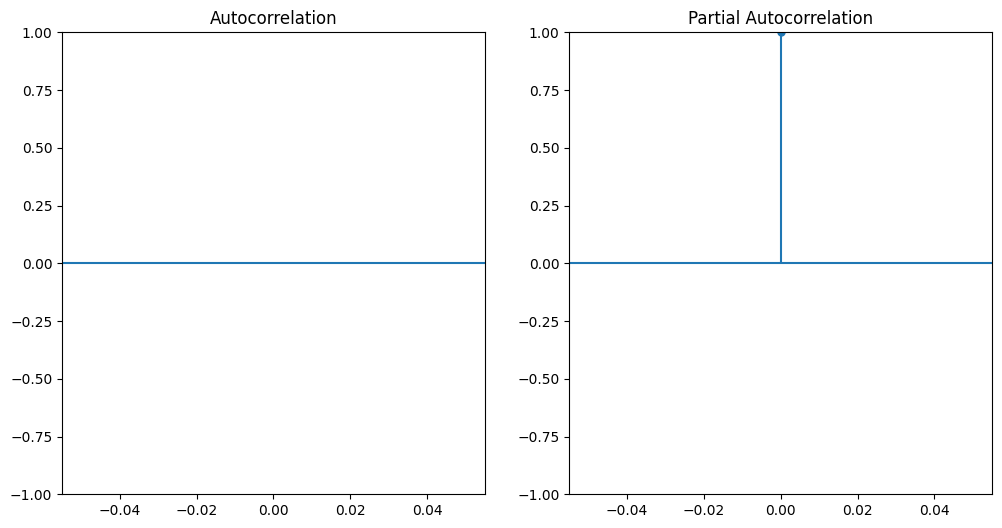

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Check stationarity using the Augmented Dickey-Fuller test
result = adfuller(df['Ex_rate'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If the p-value is less than 0.05, the series is stationary; otherwise, you need to difference the series
# If the series is non-stationary, take the first difference (d=1)
if result[1] > 0.05:
    df['Ex_rate'] = df['Ex_rate'].diff().dropna()  # Differencing the data

# Plot the ACF and PACF to identify p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], ax=plt.gca(), lags=40)  # Check ACF
plt.subplot(122)
plot_pacf(df['Ex_rate'], ax=plt.gca(), lags=40)  # Check PACF
plt.show()


In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Use the selected parameters (replace with your chosen values for p, d, q)
p, d, q = 1, 1, 1  # Example: Modify these values based on your plots

# Fit the ARIMA model
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
model_arima_fit = model_arima.fit()

# Check the summary of the model
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28033.729
Date:                Sun, 22 Dec 2024   AIC                         -56061.458
Time:                        21:42:10   BIC                         -56040.655
Sample:                             0   HQIC                        -56054.319
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1329      0.002    -60.508      0.000      -0.137      -0.129
ma.L1         -0.9999      0.044    -22.520      0.000      -1.087      -0.913
sigma2      3.585e-05   1.56e-06     22.972      0.0

C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))  # Replace p, d, q with selected values
model_arima_fit = model_arima.fit()

# Check the summary of the model
model_arima_fit.summary()


C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28033.729
Date:                Sun, 22 Dec 2024   AIC                         -56061.458
Time:                        21:42:14   BIC                         -56040.655
Sample:                             0   HQIC                        -56054.319
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1329      0.002    -60.508      0.000      -0.137      -0.129
ma.L1         -0.9999      0.044    -22.520      0.000      -1.087      -0.913
sigma2      3.585e-05   1.56e-06     22.972      0.000    3.28e-05    3.89e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2858926.76
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

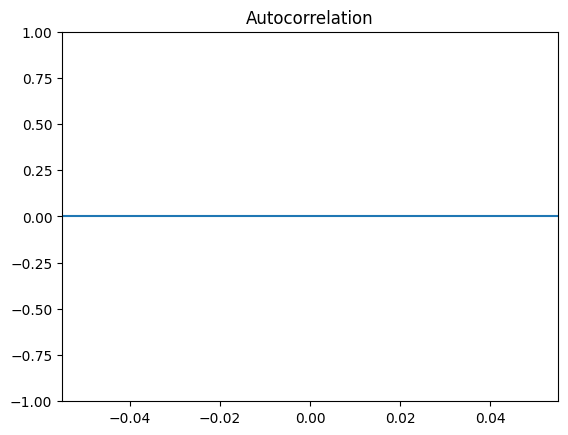

In [53]:
# Plot residuals
residuals = model_arima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Check for autocorrelation in residuals
plot_acf(residuals)
plt.show()


C:\Users\dheve\AppData\Local\Temp\ipykernel_31364\693798461.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='M'), forecast_arima, label='ARIMA Forecast', color='red')


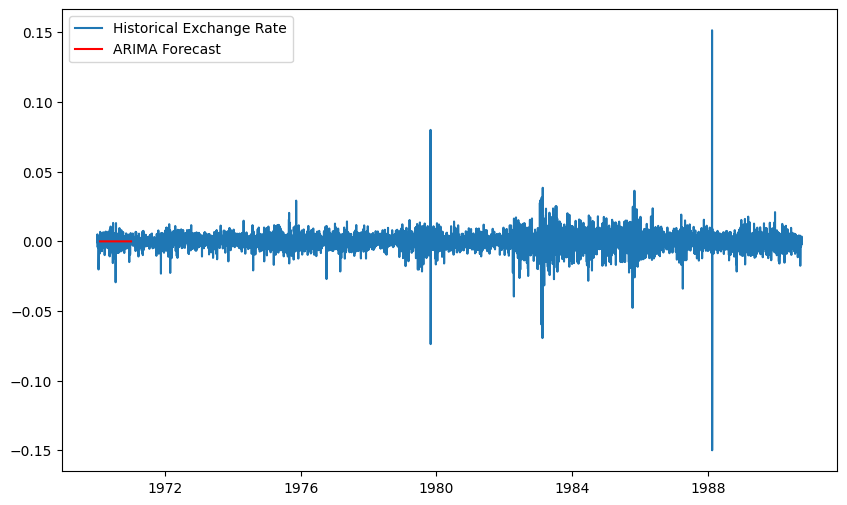

In [54]:
# Forecasting
forecast_steps = 12  # Forecast for 12 months ahead
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical Exchange Rate')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='M'), forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()


In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# If the series exhibits trend and seasonality, we use Holt-Winters
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_es_fit = model_es.fit()

# Check the summary of the model
model_es_fit.summary()


C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                                nan
Optimized:                         True   AIC                                nan
Trend:                         Additive   BIC                                nan
Seasonal:                      Additive   AICC                               nan
Seasonal Periods:                    12   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         21:42:15
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend                  0.0001                 beta                 True
smoothing_seasonal               0.0001                gamma                 True
initial_level                -0.0001611                  l.0                 True
initial_trend                -0.0002348                  b.0                 True
initial_seasons.0             0.0016389                  s.0                 True
initial_seasons.1            -0.0004517                  s.1                 True
initial_seasons.2            -0.0078986                  s.2                 True
initial_seasons.3            -0.0044288                  s.3                 True
initial_seasons.4             0.0017712                  s.4                 True
initial_seasons.5             0.0008931                  s.5                 True
initial_seasons.6            -0.0006031                  s.6                 True
initial_seasons.7             0.0033400                  s.7                 True
initial_seasons.8             0.0031014                  s.8                 True
initial_seasons.9             0.0008733                  s.9                 True
initial_seasons.10            0.0017691                 s.10                 True
initial_seasons.11          -4.8322e-06                 s.11                 True
---------------------------------------------------------------------------------
"""

C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                                nan
Optimized:                         True   AIC                                nan
Trend:                         Additive   BIC                                nan
Seasonal:                      Additive   AICC                               nan
Seasonal Periods:                    12   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         21:42:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend          

C:\Users\dheve\AppData\Local\Temp\ipykernel_31364\1223612956.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast_es, label='Exponential Smoothing Forecast', color='green')


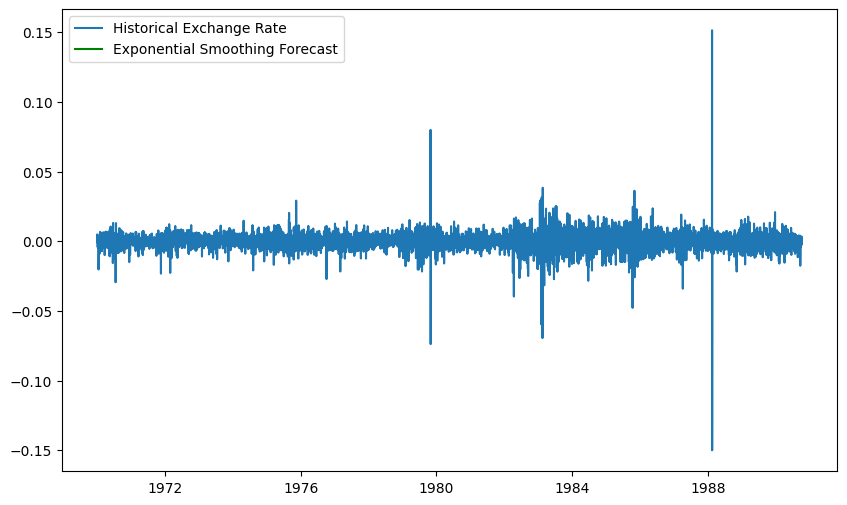

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model with additive trend and seasonal components
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_es_fit = model_es.fit()

# Check the model's summary
print(model_es_fit.summary())

# Forecast for the next 12 months
forecast_es = model_es_fit.forecast(steps=12)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical Exchange Rate')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast_es, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.show()


In [57]:
# Check for missing values in the original data
print(df['Ex_rate'].isnull().sum())

# Check for missing values in the forecast data
print(pd.Series(forecast_es).isnull().sum())


1
12


In [61]:
# Drop missing values from both the actual and forecasted data
df_cleaned = df.dropna(subset=['Ex_rate'])
forecast_es_cleaned = forecast_es[~pd.isnull(forecast_es)]  # Remove NaNs from the forecasted values


In [58]:
# Forward fill missing values (fill NaNs with the previous available value)
df['Ex_rate'].fillna(method='ffill', inplace=True)


C:\Users\dheve\AppData\Local\Temp\ipykernel_31364\3742574098.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'].fillna(method='ffill', inplace=True)
